Code assimilated from https://github.com/OceanParcels/Lagrangian_diags/

In [41]:
import time

print(time.ctime(time.time()))

Wed Aug 16 16:24:56 2023


Import packages

In [30]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as features
from matplotlib import colors
import sys

In [31]:
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, xarray, scipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.8.11 64bit [GCC 7.5.0]
IPython 7.27.0
OS Linux 4.18.0 477.21.1.el8_8.x86_64 x86_64 with glibc2.17
numpy 1.22.3
xarray 0.19.0
scipy 1.7.1
Wed Aug 16 16:14:56 2023 CEST

Loading data

In [32]:
home_folder = '/nethome/manra003/Lagrangian_diags/'
output_folder = home_folder+ 'outputs/ftle/'

<h4> Td: Time in days after simulation

In [33]:
Td=15

In [34]:
sys.path.insert(0, home_folder + "Diagnostics/Functions/")
import FTLE


In [35]:

ds = xr.open_dataset(home_folder + 'Simulations/toy_data_01.nc')
# boundaries to use for the toy dataset plot
# left_lon,right_lon = 0, 12
# bottom_lat, top_lat = -42, -30
ds

<xarray.Dataset>
Dimensions:     (traj: 144, obs: 121)
Dimensions without coordinates: traj, obs
Data variables:
    trajectory  (traj, obs) float64 ...
    time        (traj, obs) datetime64[ns] ...
    lat         (traj, obs) float32 ...
    lon         (traj, obs) float32 ...
    z           (traj, obs) float32 ...
    U           (traj, obs) float32 ...
    V           (traj, obs) float32 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.1.dev20+g92f2fb90
    parcels_mesh:           spherical

In [36]:
coords0, coords1 = 12, 12

# # initial position
# x0 = np.reshape(ds['lon'][:,0].data, (grid_lons.shape[0], grid_lons.shape[1]))
# y0 = np.reshape(ds['lat'][:,0].data, (grid_lons.shape[0], grid_lons.shape[1])) 

# # final position
# x1 = np.reshape(ds['lon'][:,-1].data, (grid_lons.shape[0], grid_lons.shape[1]))
# y1 = np.reshape(ds['lat'][:,-1].data, (grid_lons.shape[0], grid_lons.shape[1]))

# initial position
x0 = np.reshape(ds['lon'][:,0].data, (coords0, coords1))
y0 = np.reshape(ds['lat'][:,0].data, (coords0, coords1)) 

# final position
x1 = np.reshape(ds['lon'][:,-1].data, (coords0, coords1))
y1 = np.reshape(ds['lat'][:,-1].data, (coords0, coords1))

In [37]:
ftle_array = FTLE.compute_ftle(x0,y0,x1,y1, Td)

0.13078187 0.27300897


Plot the ftle on the map

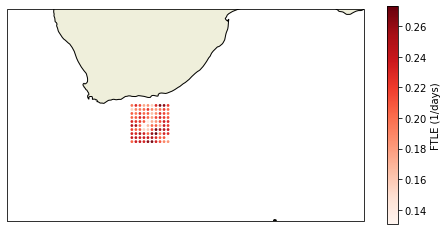

In [38]:
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(features.LAND)
ax.add_feature(features.COASTLINE)
plt.scatter(ds['lon'][:,0], ds['lat'][:,0], c=ftle_array, cmap='Reds', s=3)
ax.set_xlim(10, 47)
ax.set_ylim(-47, -25)
cbar = plt.colorbar()
cbar.set_label("FTLE (1/days)")


<h3> Land mass in the release grid</h3>
If the region you are interested in also has a land mass, you can do the following:

1. Create a regular array of particle locations over the whole area (land and water).
2. Use the land mask from the ocean model data to create a boolean matrix corresponding to the released particles and extract the ocean only particles.
3. After the simulation, use the boolean mask array to map the released particles initial (and final) locations to an array of the boolean matrix shape. Non-ocean particles are set to NAN.
